# Train an Autoencoder for Anomaly Detection
Complete the TODO sections to implement an autoencoder model for anomaly detection. The autoencoder will be trained on the MNIST dataset, and anomalies will be detected based on reconstruction errors.

1. Define the Autoencoder Architecture:
  + Encoder:
      + Implement a series of convolutional layers followed by max-pooling layers.
      + The encoder should progressively reduce the spatial dimensions of the input image.
  + Decoder:
      + Implement a series of transposed convolutional layers (also known as deconvolutional layers) to upsample the encoded representation.
      + Ensure that the output of the decoder matches the original input image size.
      + Use a Sigmoid activation function in the final layer to constrain the output pixel values between 0 and 1.
2. Forward Pass:
  + Implement the forward method where the input image is passed through the encoder to obtain a compressed representation, followed by passing it through the decoder to reconstruct the image.
  Hint:

<details>
  <summary>💡 Hint</summary>
  Focus on the encoder to downsample the input and the decoder to upsample and reconstruct the image.
</details>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
# Define an Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample to 14x14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample to 7x7
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),  # To keep pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
# Training loop
epochs = 10
for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.9243
Epoch [2/10], Loss: 0.8939
Epoch [3/10], Loss: 0.9047
Epoch [4/10], Loss: 0.8792
Epoch [5/10], Loss: 0.8849
Epoch [6/10], Loss: 0.8775
Epoch [7/10], Loss: 0.8920
Epoch [8/10], Loss: 0.8684
Epoch [9/10], Loss: 0.8748
Epoch [10/10], Loss: 0.8688


In [5]:
# Detect anomalies using reconstruction error
threshold = 0.1  # Define a threshold for anomaly detection
model.eval()
anomalies = []
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed = model(images)
        loss = criterion(reconstructed, images)
        
        # If reconstruction error exceeds the threshold, mark it as an anomaly
        if loss.item() > threshold:
            anomalies.append(images)

Anomaly image shape: torch.Size([28, 28])


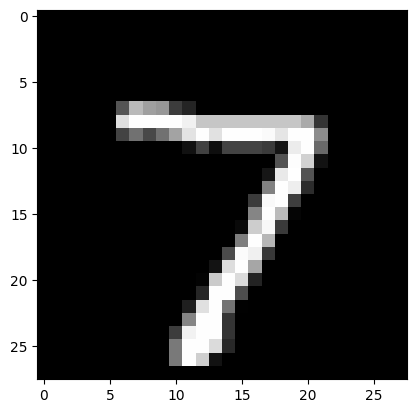

In [9]:
# Visualize anomalies
if anomalies:
    # Select the first anomaly and remove the channel dimension for visualization
    anomaly_image = anomalies[0][0].squeeze()  # Remove the channel dimension (1)
    print(f"Anomaly image shape: {anomaly_image.shape}")  # Optional: Check the shape of the image
    plt.imshow(anomaly_image.cpu().numpy(), cmap='gray')  # Convert tensor to NumPy array for visualization
    plt.show()
else:
    print("No anomalies detected.")
